# OpenCV DNN Module

In [204]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Loading the Class Text Files

In [205]:
# read the ImageNet class names
with open("../../input/classification_classes_ILSVRC2012.txt", "r") as f:
    image_net_names = f.read().split("\n")
    
# final class names (just the first word of the many ImageNet names for one image)
class_names = [name.split(",")[0] for name in image_net_names]

## Load the Pre-Trained DenseNet121 Model from Disk

In [206]:

# load the neural network model
model = cv2.dnn.readNet(
    model="../../input/DenseNet_121.caffemodel",
    config="../../input/DenseNet_121.prototxt",
    framework="Caffe",
)

# Also can use the following code to load the model
# model = cv2.dnn.readNetFromCaffe(
#     prototxt="../../input/DenseNet_121.prototxt",
#     caffeModel="../../input/DenseNet_121.caffemodel",
# )

## Read the Image and Prepare it for Model Input

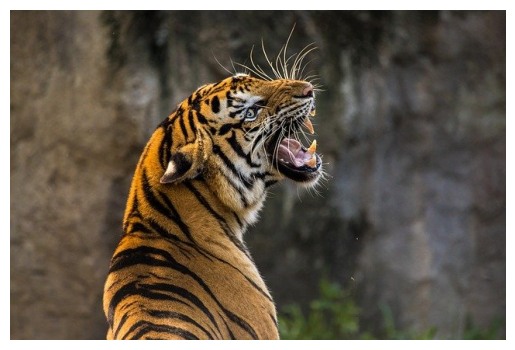

In [207]:
# load the image from disk
image = cv2.imread("../../input/image_1.jpg")

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [208]:
# This function performs mean subtraction and scaling. 
# It also optionally resizes and crops the image from the center, subtracting the mean values, 
# scaling the values by scalefactor, and then resizing the image to size size × size.
blob = cv2.dnn.blobFromImage(
    image=image, scalefactor=0.01, size=(224, 224), mean=(104, 117, 123)
)


## Forward Propagate the Input Through the Model

In [209]:
# set the input blob for the neural network
model.setInput(blob)

# forward pass image blog through the model
outputs = model.forward()

# flatten the output array
final_outputs = outputs.flatten().reshape(1000, 1)
final_outputs[:5]

array([[-1.4462441],
       [-0.6374215],
       [-1.0483714],
       [-0.8401612],
       [-3.6291022]], dtype=float32)

## Find the Class Label with the Largest Probability

In [210]:
def softmax(x: np.ndarray) -> np.ndarray:
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


# get the class label
label_id = np.argmax(final_outputs)
print(f"Argmax of the final outputs (label_id): {label_id}")

# use softmax function to get the probabilities
probs = softmax(final_outputs)

# get the final highest probability
final_prob = np.max(probs) * 100.0
print(f"Final probability: {final_prob:.2f}%")


Argmax of the final outputs (label_id): 292
Final probability: 91.03%


# map the argmax to the label names

In [211]:
# map the max confidence to the class label names
out_name = class_names[label_id]
out_text = f"{out_name}, {final_prob:.3f}%"
print(out_text)

tiger, 91.030%


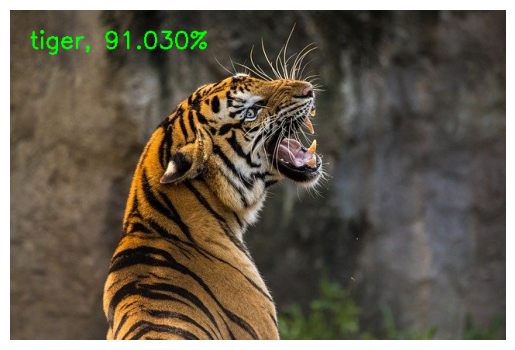

In [212]:
# put the class name text on top of the image
cv2.putText(image, out_text, (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [213]:
# Show the 10 highest probabilities
top_10 = np.argsort(probs, axis=0)[-10:][::-1]
top_10 = top_10.flatten()
top_10_prob = np.sort(probs, axis=0)[-10:][::-1]
top_10_prob = top_10_prob.flatten() * 100
top_10_names = [class_names[i] for i in top_10]

# Show them in a table
print("Top 10 classes:")
print("--------------")
for i, (name, prob) in enumerate(zip(top_10_names, top_10_prob)):
    name = name.ljust(30, ".")
    print(f"{i+1:02}. {name} {prob:6.3f}%")

Top 10 classes:
--------------
01. tiger......................... 91.030%
02. tiger cat.....................  8.816%
03. jaguar........................  0.131%
04. leopard.......................  0.008%
05. zebra.........................  0.006%
06. tabby.........................  0.003%
07. lynx..........................  0.002%
08. cougar........................  0.001%
09. lion..........................  0.001%
10. Egyptian cat..................  0.001%
